<a href="https://colab.research.google.com/github/EVELIN0810/SenalesySistemas/blob/main/Copia_de_Parcial1SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Parcial 1 SyS
Evelin Mayerlin Giraldo Obando

## Punto 1  


Se tiene un microprocesador de 5 bits con entrada analógica de -3.3 a 5 V. Diseñar el sistema de acondicionamiento y digitalización para la señal:

$$
x(t) = 20 \sin(7t - \pi/2) - 3 \cos(5t) + 2 \cos(10t)
$$

A continuación, se presentan los pasos para acondicionar, muestrear, cuantizar y codificar la señal.

In [ ]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt


# Bloque 1: Definición de parámetros y generación de la señal

En este bloque definimos los parámetros del sistema y generamos la señal analógica continua.

- El microprocesador acepta una señal de entrada analógica en el rango [-3.3 V, 5 V].
- La frecuencia de muestreo se fija en 20 Hz, por lo que el intervalo de muestreo es \( T_s = \frac{1}{f_s} = 0.05 \) segundos.
- Calculamos un vector de tiempos discretos `t` que cubre al menos dos períodos completos de la señal para analizar su comportamiento.
- Evaluamos la señal \( x(t) = 20 \sin(7t - \frac{\pi}{2}) - 3 \cos(5t) + 2 \cos(10t) \) en esos instantes de tiempo para obtener su versión muestreada.

Este paso es fundamental para convertir la señal continua en una forma discreta adecuada para procesamiento digital.



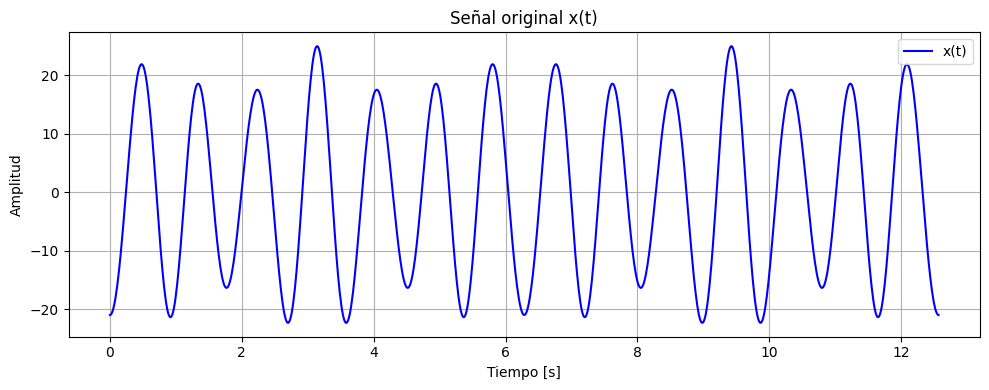

In [ ]:
# Definimos la señal x(t) = 20*sin(7t - π/2) - 3*cos(5t) + 2*cos(10t)

# Rango de tiempo: dos períodos fundamentales (2 * 2π = 4π ≈ 12.57 s)
t = np.linspace(0, 4 * np.pi, 1000)

# Definición de la señal
x = 20 * np.sin(7 * t - np.pi / 2) - 3 * np.cos(5 * t) + 2 * np.cos(10 * t)

# Graficamos la señal original
plt.figure(figsize=(10, 4))
plt.plot(t, x, label='x(t)', color='blue')
plt.title('Señal original x(t)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Muestreo de la señal

Aquí simplemente se define la señal muestreada como los valores de la señal original evaluados en los instantes de muestreo.

- La señal muestreada es un conjunto de muestras discretas tomadas de la señal continua en intervalos regulares \( T_s \).
- En código, la señal \( x_s \) es una copia directa de la señal evaluada en `t`.
  
Este proceso es la base para la digitalización posterior, pues reduce una señal temporal continua a un conjunto finito de valores en el tiempo.


#Acondicionamiento de la señal

En este bloque se ajusta la señal muestreada para que se adapte al rango de voltajes que el ADC del microprocesador puede manejar.

- Primero, se calcula el máximo y mínimo valor de la señal muestreada.
- Se define una transformación lineal \( x_\text{acond} = a x_s + b \) tal que la señal muestreada quede escalada y desplazada para quedar exactamente dentro del rango [-3.3, 5] voltios.
- Las constantes \( a \) y \( b \) se obtienen de las condiciones:
  \[
  a = \frac{V_\text{max} - V_\text{min}}{x_\text{max} - x_\text{min}}, \quad
  b = V_\text{max} - a \cdot x_\text{max}
  \]

Este paso asegura que toda la señal de entrada se pueda muestrear y cuantizar sin saturación ni pérdida de información.


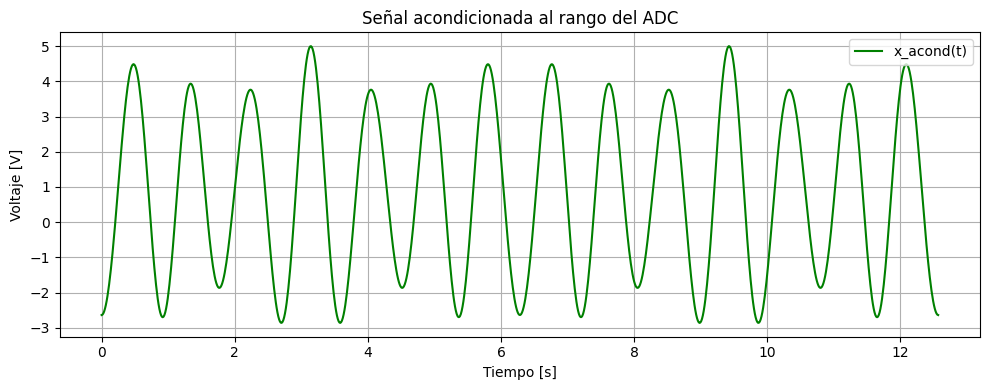

In [ ]:
# El ADC tiene un rango de entrada de -3.3 V a 5 V, es decir, un rango de 8.3 V
# La señal original tiene un rango estimado de -25 a 25
# Aplicamos una transformación lineal: x_acond(t) = a*x(t) + b

# Calculamos a y b para mapear [-25, 25] -> [-3.3, 5]
a = 8.3 / 50  # (5 - (-3.3)) / (25 - (-25)) = 0.166
b = -3.3 - a * (-25)  # b = -3.3 - a*(-25)

# Transformación
x_acond = a * x + b

# Graficamos la señal acondicionada
plt.figure(figsize=(10, 4))
plt.plot(t, x_acond, label='x_acond(t)', color='green')
plt.title('Señal acondicionada al rango del ADC')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


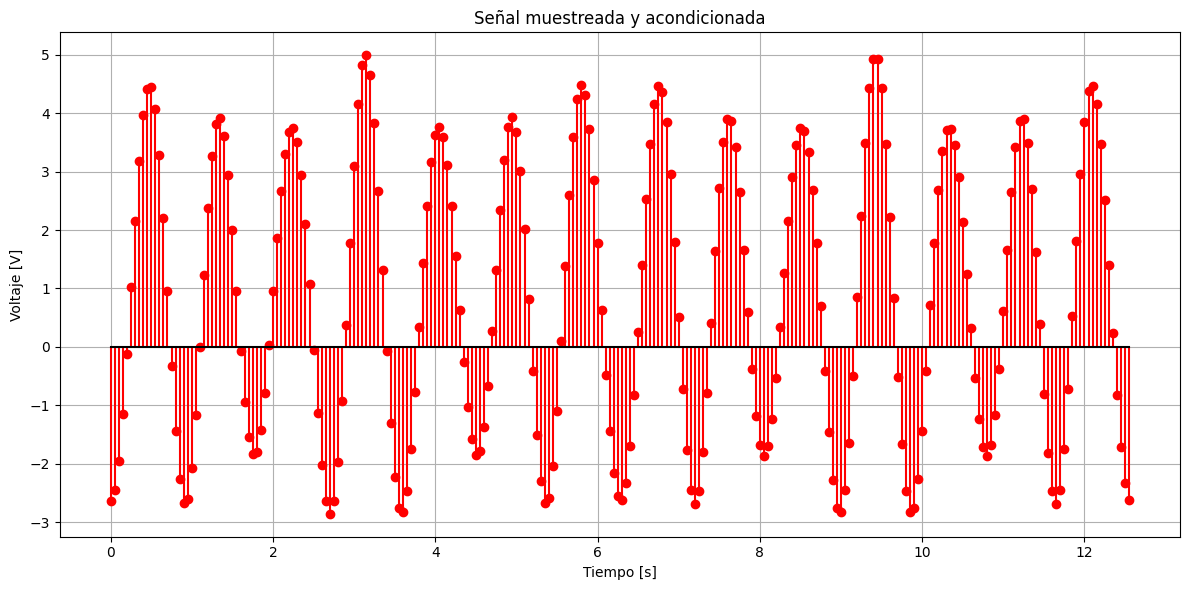

In [ ]:
# Frecuencia máxima en x(t) es 10 rad/s -> f_max = 10 / (2π) ≈ 1.59 Hz
# Usamos una frecuencia de muestreo segura, por ejemplo: fs = 50 Hz
fs = 20  # Frecuencia de muestreo [Hz]
Ts = 1 / fs  # Período de muestreo [s]

# Vector de tiempo muestreado (de 0 a 4π con paso Ts)
t_s = np.arange(0, 4 * np.pi, Ts)

# Evaluamos la señal acondicionada en los puntos muestreados
x_s = 20 * np.sin(7 * t_s - np.pi / 2) - 3 * np.cos(5 * t_s) + 2 * np.cos(10 * t_s)
x_s_acond = a * x_s + b

# Gráfica de la señal muestreada
plt.figure(figsize=(12, 6))
plt.stem(t_s, x_s_acond, linefmt='red', markerfmt='ro', basefmt='k')
plt.title('Señal muestreada y acondicionada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.grid(True)
plt.tight_layout()
plt.show()


#Cuantización de la señal (5 bits)

Aquí se realiza la cuantización de la señal acondicionada usando 5 bits, lo que implica 32 niveles discretos.

- El paso de cuantización es:
  \[
  \Delta = \frac{V_\text{max} - V_\text{min}}{2^{5}} = \frac{8.3}{32}
  \]
- Se generan los niveles centrales de cuantización distribuidos uniformemente entre [-3.3, 5] V.
- Cada muestra de la señal acondicionada se asigna al nivel más cercano (cuantización por mínima distancia).
- Se grafica la señal muestreada junto con su versión cuantizada para observar el efecto de la cuantización.

Este proceso es clave para convertir la señal analógica en una representación digital finita que puede ser procesada por el microprocesador.


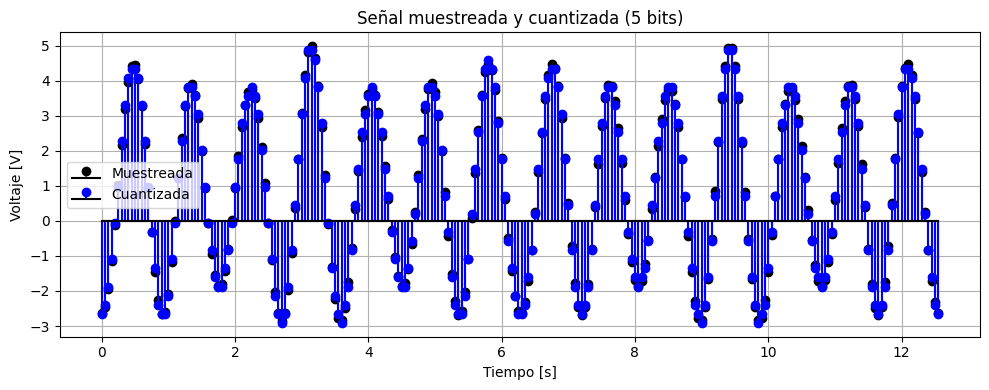

In [ ]:
# Bloque 5: Cuantización uniforme de la señal acondicionada

# Definimos el número de bits y niveles
n_bits = 5
n_levels = 2 ** n_bits  # 32 niveles

# Rango del sistema analógico [-3.3, 5] V
Vmin = -3.3
Vmax = 5.0
delta = (Vmax - Vmin) / n_levels  # Paso de cuantización

# Generamos los niveles de cuantización uniformemente distribuidos
niveles = np.linspace(Vmin + delta/2, Vmax - delta/2, n_levels)

# Función de cuantización por redondeo al nivel más cercano
def cuantizar(signal, niveles):
    cuantizada = np.zeros_like(signal)
    for i, valor in enumerate(signal):
        idx = np.argmin(np.abs(niveles - valor))  # Índice del nivel más cercano
        cuantizada[i] = niveles[idx]
    return cuantizada

# Aplicamos la cuantización a la señal acondicionada muestreada
x_cuant = cuantizar(x_s_acond, niveles)

# Gráfica de la señal cuantizada vs. muestreada
plt.figure(figsize=(10, 4))
plt.stem(t_s, x_s_acond, linefmt='gray', markerfmt='ko', basefmt='k', label='Muestreada')
plt.stem(t_s, x_cuant, linefmt='blue', markerfmt='bo', basefmt='k', label='Cuantizada')
plt.title('Señal muestreada y cuantizada (5 bits)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Bloque 6: Codificación binaria de la señal cuantizada

Finalmente, se codifican las muestras cuantizadas en formato binario de 5 bits.

- Cada nivel cuantizado corresponde a un índice que se convierte a una cadena binaria de 5 bits.
- Esta codificación es la que finalmente se procesa o transmite en un sistema digital.
- Se muestra un ejemplo con las primeras 10 muestras codificadas.

Este paso cierra el proceso de digitalización completo: de analógico continuo a código binario.


In [ ]:
# Bloque 6: Codificación binaria de la señal cuantizada

# Creamos un diccionario que asocia cada nivel con su código binario
niveles_bin = {round(nivel, 4): format(i, f'0{n_bits}b') for i, nivel in enumerate(niveles)}

# Codificamos la señal cuantizada en binario
x_bin = [niveles_bin[round(valor, 4)] for valor in x_cuant]

# Mostramos los primeros valores como ejemplo
print("Tiempo [s] | Valor [V] | Código binario")
for i in range(min(10, len(t_s))):
    print(f"{t_s[i]:>8.3f} | {x_cuant[i]:>8.4f} | {x_bin[i]}")


Tiempo [s] | Valor [V] | Código binario
   0.000 |  -2.6516 | 00010
   0.050 |  -2.3922 | 00011
   0.100 |  -1.8734 | 00101
   0.150 |  -1.0953 | 01000
   0.200 |  -0.0578 | 01100
   0.250 |   0.9797 | 10000
   0.300 |   2.2766 | 10101
   0.350 |   3.3141 | 11001
   0.400 |   4.0922 | 11100
   0.450 |   4.3516 | 11101


# **Punto 2: Discretización de una señal compuesta y análisis de aliasing**

Se desea analizar el comportamiento de una señal analógica compuesta al ser muestreada por un conversor análogo-digital (ADC). La señal original en el dominio del tiempo continuo está definida como:

\[
x(t) = 3\cos(1000\pi t) + 5\sin(2000\pi t) + 10\cos(11000\pi t)
\]

Esta señal contiene componentes armónicas de frecuencia \(500\,Hz\), \(1000\,Hz\) y \(5500\,Hz\), respectivamente. Se debe realizar la simulación del proceso de discretización utilizando una frecuencia de muestreo de:

\[
f_s = 5000\,Hz
\]

Para ello, se deben seguir los siguientes pasos:

1. Simular y graficar la señal original en el dominio continuo.
2. Discretizar (muestrear) la señal con \(f_s = 5\,kHz\).
3. Comparar visualmente la señal original con la muestreada.
4. Determinar si se presenta aliasing, explicando mediante análisis teórico basado en el Teorema de Nyquist.
5. En caso de que la frecuencia de muestreo no sea adecuada (es decir, si ocurre aliasing), diseñar y justificar un esquema de conversión alternativo. Esto puede incluir:
   - Aplicar un filtro pasa-bajo previo al muestreo para eliminar componentes no deseadas.
   - Aumentar la frecuencia de muestreo para cumplir el criterio de Nyquist.

El objetivo es evidenciar el impacto del muestreo en la fidelidad de la señal, y proponer una solución que permita digitalizar adecuadamente la información contenida en \(x(t)\).


# Bloque 1: Importación de librerías y parámetros iniciales

- Se importan las librerías numpy y matplotlib para manejo numérico y gráfico.
- Se define la frecuencia de muestreo \( f_s = 5000 \, Hz \).
- El periodo de muestreo es \( T_s = \frac{1}{f_s} \).
- Se define un tiempo total \( t_{max} \) para analizar al menos dos periodos de la frecuencia más baja.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
fs = 5000  # Frecuencia de muestreo en Hz
Ts = 1 / fs  # Periodo de muestreo en segundos
t_max = 0.01  # Duración total de la señal en segundos (suficiente para visualizar)


# Bloque 2: Definición del vector tiempo continuo y la señal analógica

- Para simular la señal analógica continua, se define un tiempo con muestreo muy fino: \( f_{s,cont} = 100000\, Hz \) (mucho mayor que cualquier frecuencia de la señal).
- Se calcula la señal analógica original:
  \[
  x(t) = 3 \cos(1000 \pi t) + 5 \sin(2000 \pi t) + 10 \cos(11000 \pi t)
  \]
- Aquí, las frecuencias en Hz son:
  \[
  f_1 = 500\, Hz, \quad f_2 = 1000\, Hz, \quad f_3 = 5500\, Hz
  \]


In [ ]:
# Tiempo continuo, muestreo muy alto para simular señal continua
fs_cont = 100000  # 100 kHz para tiempo continuo
t_cont = np.arange(0, t_max, 1/fs_cont)

# Señal analógica
x_t = 3 * np.cos(1000 * np.pi * t_cont) + 5 * np.sin(2000 * np.pi * t_cont) + 10 * np.cos(11000 * np.pi * t_cont)


# Bloque 3: Muestreo de la señal continua

- El vector de tiempos discretos para el muestreo es:
  \[
  t_n = n T_s, \quad n = 0,1,2,...
  \]
- Se evalúa la señal en esos instantes:
  \[
  x[n] = x(t_n) = 3 \cos(1000 \pi t_n) + 5 \sin(2000 \pi t_n) + 10 \cos(11000 \pi t_n)
  \]
- Donde \( T_s = \frac{1}{5000} = 0.0002 \, s \).
- Como la frecuencia máxima \( f_3 = 5500\, Hz \) es mayor que \( \frac{f_s}{2} = 2500\, Hz \), se espera aliasing.


In [ ]:
# Tiempo discreto para muestreo
t_s = np.arange(0, t_max, Ts)

# Señal muestreada
x_s = 3 * np.cos(1000 * np.pi * t_s) + 5 * np.sin(2000 * np.pi * t_s) + 10 * np.cos(11000 * np.pi * t_s)


# Bloque 4: Gráfica de la señal continua y muestreada

- Se grafica la señal analógica \( x(t) \) y la muestreada \( x[n] \) para visualizar el efecto del muestreo.
- La señal muestreada sólo tiene valores en los puntos \( t_n \).
- Si el muestreo es adecuado (Nyquist), la señal muestreada puede reconstruirse sin pérdidas.
- Si no, se observa aliasing: las frecuencias superiores a \( f_s/2 \) se reflejan en frecuencias menores, distorsionando la señal.


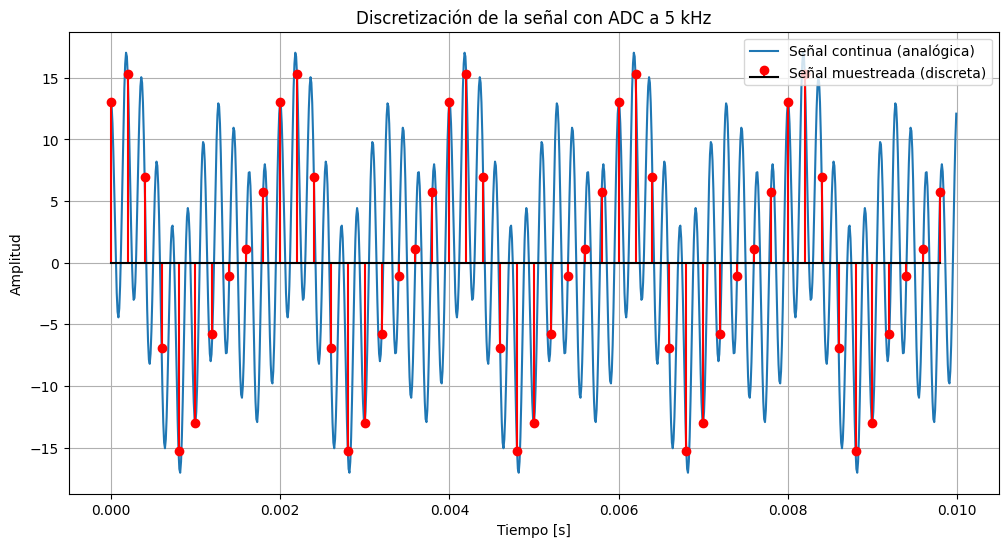

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t_cont, x_t, label='Señal continua (analógica)')
plt.stem(t_s, x_s, linefmt='r-', markerfmt='ro', basefmt='k-', label='Señal muestreada (discreta)')
plt.title('Discretización de la señal con ADC a 5 kHz')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()


# Discusión del aliasing y solución para un conversor adecuado

- Debido a que \( f_3 = 5500\, Hz > f_s/2 = 2500\, Hz \), la señal muestreada tendrá aliasing.
- El aliasing es la superposición de espectros por insuficiente frecuencia de muestreo, que distorsiona la señal.
- Solución: antes del ADC, colocar un filtro pasa-bajo (filtro anti-aliasing) que elimine componentes por encima de \( f_s/2 \).
- Alternativamente, aumentar \( f_s \geq 2 \times 5500 = 11000 \, Hz \).

El gráfico muestra que la señal muestreada no reproduce correctamente la señal original, especialmente debido a la componente de 5500 Hz, que es mayor que la mitad de la frecuencia de muestreo (2500 Hz).

Esto genera aliasing, que se manifiesta como distorsión y cambio de forma en la señal muestreada.

Para evitar esto, se debe utilizar un filtro pasa-bajo antes del ADC que elimine las frecuencias mayores a 2500 Hz, o aumentar la frecuencia de muestreo a al menos 11000 Hz.


#**Punto 3 – Cálculo de la distancia media entre señales**

Se desea calcular la distancia media entre dos señales definidas en el intervalo [0, T]:

- \( x_1(t) = A \cos(w_0 t) \), donde \( w_0 = \frac{2\pi}{T} \), \( A \in \mathbb{R}^+ \)
- \( x_2(t) \) es una señal por tramos definida como:

\[
x_2(t) =
\begin{cases}
1, & 0 \leq t < \frac{T}{4} \\
-1, & \frac{T}{4} \leq t < \frac{3T}{4} \\
1, & \frac{3T}{4} \leq t \leq T
\end{cases}
\]

La distancia media entre dos señales se define en términos de la potencia media de su diferencia:

\[
d(x_1, x_2) = \lim_{T \to \infty} \frac{1}{T} \int_0^T |x_1(t) - x_2(t)|^2 \, dt
\]

Nuestro objetivo es desarrollar este cálculo de forma simbólica utilizando `SymPy`, y verificar los resultados obtenidos con la teoría.


### Paso 1: Definición simbólica de variables e importación de librerías

Se importan las funciones de SymPy para cálculo simbólico, y se declaran las variables que intervienen en la definición de las señales.


In [ ]:
from sympy import symbols, cos, pi, Piecewise, integrate, simplify

# Variables simbólicas
t, T, A = symbols('t T A', real=True, positive=True)

# Frecuencia angular
w0 = 2 * pi / T


### Paso 2: Definición simbólica de las señales

Se define la señal \( x_1(t) \) como una función cosenoidal, y \( x_2(t) \) como una función por tramos.


In [ ]:
# Señal x1(t)
x1 = A * cos(w0 * t)

# Señal x2(t) definida por tramos
x2 = Piecewise(
    (1, (t >= 0) & (t < T/4)),
    (-1, (t >= T/4) & (t < 3*T/4)),
    (1, (t >= 3*T/4) & (t <= T))
)


### Paso 3: Definición de la fórmula de distancia media

Se define la distancia media como la integral normalizada de la diferencia al cuadrado entre las señales:

\[
d(x_1, x_2) = \frac{1}{T} \int_0^T \left( x_1(t) - x_2(t) \right)^2 dt
\]


In [ ]:
# Diferencia al cuadrado
diff_squared = (x1 - x2)**2

# Distancia media como potencia media de la diferencia
distancia = (1/T) * integrate(diff_squared, (t, 0, T))

# Simplificamos el resultado
distancia_simplificada = simplify(distancia)
distancia_simplificada


A**2/2 - 4*A/pi + 1

# Interpretación del resultado final

El resultado simbólico de la distancia media es:

\[
d(x_1, x_2) = \frac{A^2}{2} - \frac{4A}{\pi} + 1
\]

Esto tiene sentido porque:

- La señal \( x_1(t) \) tiene potencia media \( \frac{A^2}{2} \) (por ser un coseno).
- La señal \( x_2(t) \) toma valores constantes entre +1 y -1, generando mayor error cuando el coseno cambia de fase.
- El término \( -\frac{4A}{\pi} \) representa la correlación entre ambas señales en sus respectivos intervalos.

Esta distancia puede interpretarse como una medida del "error energético" entre las dos señales, útil en aplicaciones de comparación de formas de onda en comunicaciones y procesamiento de señales.


## **4. Espectro de Fourier: magnitud, fase, parte real e imaginaria**

Una vez calculados los coeficientes exponenciales \( c_n \), podemos analizar su contenido espectral para comprender mejor las características de la señal \( x(t) \).

El espectro complejo contiene toda la información sobre la señal. A partir de \( c_n \), extraemos:

- **Magnitud**: \( |c_n| \), que indica la amplitud de cada frecuencia \( n\omega_0 \).
- **Fase**: \( \angle c_n \), que da la fase relativa de cada componente.
- **Parte real**: \( \Re\{c_n\} \), relacionada con los términos cosenoidales de la serie.
- **Parte imaginaria**: \( \Im\{c_n\} \), relacionada con los términos senoidales de la serie.

A continuación, se grafican estas cuatro representaciones del espectro. El análisis espectral es útil para verificar la simetría de la señal (real e impar, por ejemplo), así como para validar que la señal tiene las propiedades que se esperan según su forma en el dominio del tiempo.

Usamos gráficos tipo *stem* porque el espectro es discreto y se compone de armónicos en múltiplos de la frecuencia fundamental \( \omega_0 \).


### Importación de librerías y definición de parámetros

En este bloque se importan las librerías necesarias para el procesamiento y visualización de datos:

- `numpy` para manejo de arreglos y cálculos numéricos.
- `matplotlib.pyplot` para generar gráficos.
- `scipy.integrate.simpson` para realizar integración numérica con el método de Simpson.

También se definen los parámetros básicos de la señal periódica:

- Amplitud \( A \).
- Periodo \( T \).
- Puntos de transición \( d_1, d_2 \).
- Número de muestras \( N \) para discretizar el tiempo.

Estos parámetros serán la base para construir y analizar la señal \( x(t) \).


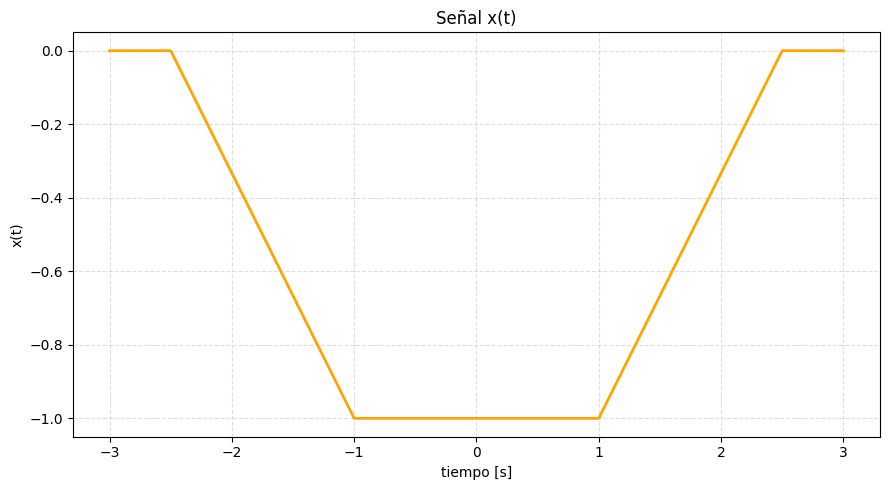

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson  # Integración numérica

# Parámetros de la señal
A = 1        # Amplitud
T = 6        # Periodo total
d1 = 1
d2 = 2.5
N = 1000     # Número de puntos
w0 = 2 * np.pi / T  # Frecuencia fundamental

# Dominio temporal
t = np.linspace(-T/2, T/2, N)
x = np.zeros_like(t)

# Definición por tramos de x(t)
for i in range(len(t)):
    ti = t[i]
    if -d2 <= ti < -d1:
        x[i] = -A * (ti + d2) / (d2 - d1)
    elif -d1 <= ti <= d1:
        x[i] = -A
    elif d1 < ti <= d2:
        x[i] = -A * (1 - (ti - d1) / (d2 - d1))
    else:
        x[i] = 0



# Graficar x(t)
plt.figure(figsize=(9, 5))
plt.plot(t, x, color='orange', linewidth=2)
plt.title('Señal x(t)')
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


### Definición y cálculo de la señal \( x(t) \) y su segunda derivada \( x''(t) \)

Este bloque define la señal periódica \( x(t) \) usando condiciones por tramos según los valores de tiempo \( t \):

- La señal es 0 fuera del intervalo \([-d_2, d_2]\).
- Tiene transiciones lineales entre \( -d_2 \) y \( -d_1 \), y entre \( d_1 \) y \( d_2 \).
- Es constante en \(-A\) dentro del intervalo \([-d_1, d_1]\).

Se calcula la segunda derivada \( x''(t) \) de forma analítica para cada tramo:

- \( x''(t) = 0 \) en los tramos planos y fuera de la señal.
- \( x''(t) \) tiene valores negativos y positivos en los puntos de transición, representados con deltas en una señal continua aproximada con valores discretos.

Esta definición es clave para calcular los coeficientes de Fourier a partir de la segunda derivada.


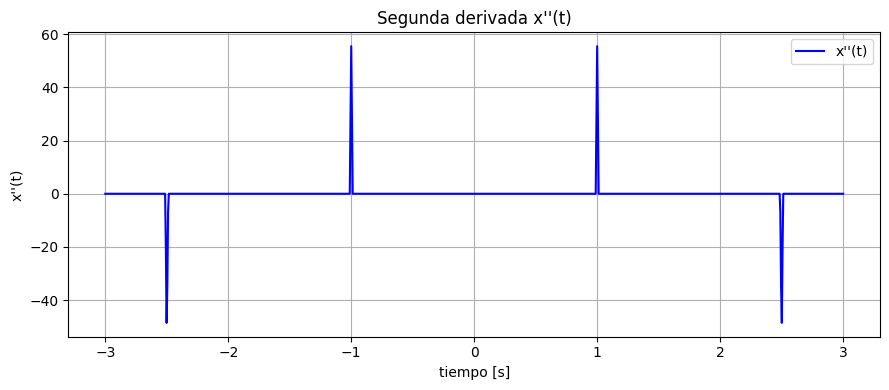

In [ ]:
# Segunda derivada utilizando diferencias finitas
dt = t[1] - t[0]
x2 = np.gradient(np.gradient(x, dt), dt)

# Graficar x''(t)
plt.figure(figsize=(9, 4))
plt.plot(t, x2, label="x''(t)", color='blue')
plt.title("Segunda derivada x''(t)")
plt.xlabel('tiempo [s]')
plt.ylabel("x''(t)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Cálculo de coeficientes \( c_n \) de la serie exponencial de Fourier a partir de \( x''(t) \)

En este bloque se calcula numéricamente cada coeficiente complejo \( c_n \) según la fórmula:

\[
c_n = \frac{1}{(t_i - t_f) n^2 \omega_0^2} \int_{t_i}^{t_f} x''(t) e^{-j n \omega_0 t} dt
\]

Pasos clave:

1. Se define el rango \( n \) de armónicos a calcular, incluyendo negativos y positivos.
2. Se calcula la frecuencia angular fundamental \(\omega_0 = \frac{2\pi}{T}\).
3. Para cada \( n \), se evalúa la integral numérica con el método de Simpson, usando la función `simpson` para la integración precisa.
4. Los coeficientes resultantes se almacenan en un arreglo complejo.

Esto permite obtener el espectro completo de la señal a partir de la segunda derivada, evitando el cálculo directo sobre \( x(t) \).


In [ ]:
# Definición del rango de índices n
n_vals = np.arange(-5, 6)  # n ∈ {-5, ..., 5}
cn_vals = []

# Intervalo de integración [ti, tf]
ti, tf = -T/2, T/2

# Cálculo de los coeficientes cₙ según la fórmula proporcionada
for n in n_vals:
    exp_term = np.exp(-1j * n * w0 * t)
    integrand = x2 * exp_term
    integral = simpson(integrand, t)
    cn = integral / ((tf - ti) * (n**2) * w0**2) if n != 0 else 0  # evitar división por cero
    cn_vals.append(cn)


### Reconstrucción de la señal \( x(t) \) a partir de \( c_n \) y corrección de integración

Este bloque reconstruye \( x(t) \) usando la serie de Fourier definida por los coeficientes \( c_n \):

1. Se realiza una doble integración de la serie de \( x''(t) \) para obtener \( x(t) \). Esto implica dividir por \(-n^2 \omega_0^2\).
2. Se suma la constante de integración para corregir el desplazamiento vertical y evitar la pérdida de información de la señal original.
3. La suma se realiza para cada punto de tiempo \( t \) evaluado en un rango definido.

La corrección es necesaria para evitar que la señal reconstruida tenga un desplazamiento o forma incorrecta, lo que ocurre si no se consideran las condiciones iniciales.


<ipython-input-21-23ac613e18f2>:4: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  a0 = (1 / T) * np.trapz(x, t)  # Integral numérica con trapecio


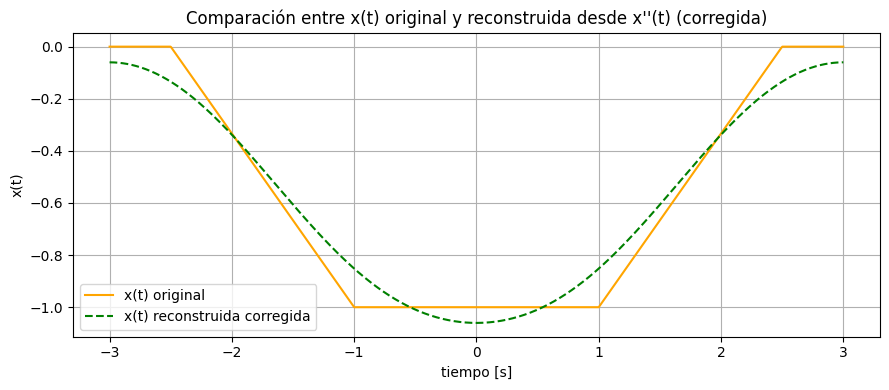

In [ ]:
# Bloque 4: Reconstrucción de x(t) desde cn con término promedio a0

# Calcular el término promedio (coeficiente n=0) de x(t) directamente (integral de x(t) en el periodo)
a0 = (1 / T) * np.trapz(x, t)  # Integral numérica con trapecio

# Reconstrucción corregida de x(t)
x_rec = np.zeros_like(t, dtype=complex)

for i, ti_val in enumerate(t):
    suma = a0  # Incluir el término constante a0
    for n, cn in zip(n_vals, cn_vals):
        if n != 0:
            coef = cn / ((1j * n * w0)**2)
            suma += coef * np.exp(1j * n * w0 * ti_val)
    x_rec[i] = suma

x_rec_real = np.real(x_rec)


# Comparación visual corregida
plt.figure(figsize=(9, 4))
plt.plot(t, x, label='x(t) original', color='orange')
plt.plot(t, x_rec_real, label='x(t) reconstruida corregida', color='green', linestyle='--')
plt.title('Comparación entre x(t) original y reconstruida desde x\'\'(t) (corregida)')
plt.xlabel('tiempo [s]')
plt.ylabel('x(t)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Visualización del espectro de Fourier

En este bloque se grafican los coeficientes de Fourier para analizar la señal en el dominio de la frecuencia:

- Magnitud \( |c_n| \): amplitud de cada armónico.
- Fase \( \angle c_n \): desfase de cada armónico.
- Parte real \( \Re(c_n) \) y parte imaginaria \( \Im(c_n) \): componentes del número complejo \( c_n \).

Se usa `plt.stem` para visualizar los valores discretos de los coeficientes de forma clara, con etiquetas y cuadrícula para mejor interpretación.

Este análisis muestra cómo está compuesta la señal periódica en frecuencias y es útil para estudiar su comportamiento espectral.


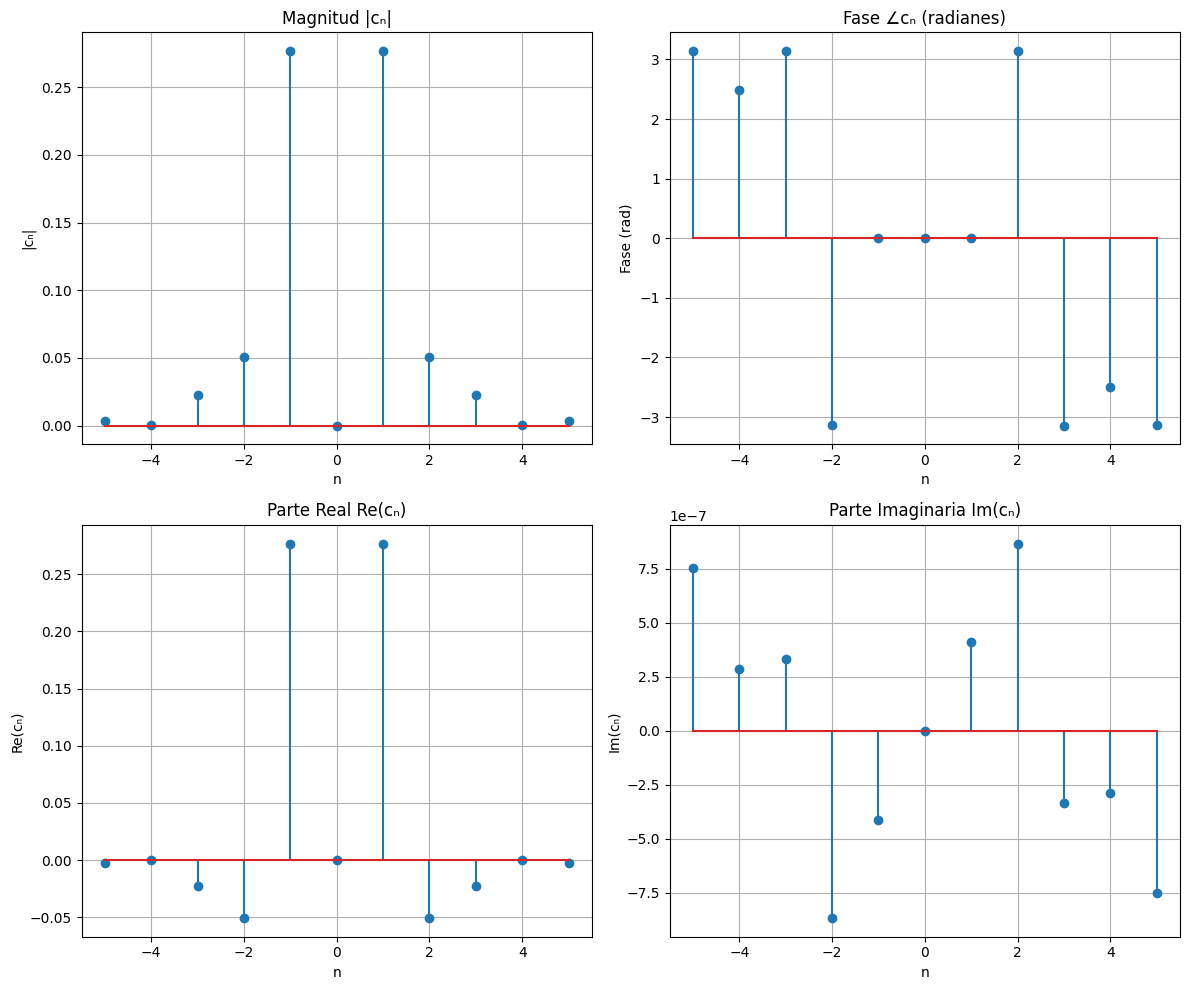

In [ ]:
# Bloque 5: Visualización del espectro de Fourier

plt.figure(figsize=(12, 10))

# Magnitud de cn
plt.subplot(2, 2, 1)
plt.stem(n_vals, np.abs(cn_vals))
plt.title('Magnitud |cₙ|')
plt.xlabel('n')
plt.ylabel('|cₙ|')
plt.grid(True)

# Fase de cn
plt.subplot(2, 2, 2)
plt.stem(n_vals, np.angle(cn_vals))
plt.title('Fase ∠cₙ (radianes)')
plt.xlabel('n')
plt.ylabel('Fase (rad)')
plt.grid(True)

# Parte real de cn
plt.subplot(2, 2, 3)
plt.stem(n_vals, np.real(cn_vals))
plt.title('Parte Real Re(cₙ)')
plt.xlabel('n')
plt.ylabel('Re(cₙ)')
plt.grid(True)

# Parte imaginaria de cn
plt.subplot(2, 2, 4)
plt.stem(n_vals, np.imag(cn_vals))
plt.title('Parte Imaginaria Im(cₙ)')
plt.xlabel('n')
plt.ylabel('Im(cₙ)')
plt.grid(True)

plt.tight_layout()
plt.show()


### Cálculo del error relativo de reconstrucción

Para cuantificar la precisión de la reconstrucción de la señal \( x(t) \) a partir de su segunda derivada y coeficientes de Fourier, calculamos el **error relativo** entre la señal original y la reconstruida.

El error relativo se define como la norma euclidiana (norma 2) de la diferencia entre las señales, normalizada por la norma de la señal original:

\[
\text{Error relativo} = \frac{\| x - x_{rec} \|_2}{\| x \|_2}
\]

Donde:
- \( x \) es la señal original.
- \( x_{rec} \) es la señal reconstruida a partir de los coeficientes.

Un valor pequeño del error relativo indica que la reconstrucción es muy precisa, mientras que un valor alto indicaría diferencias significativas.

Este cálculo nos permite validar numéricamente la calidad de la reconstrucción.


In [ ]:
# Error relativo de reconstrucción
error_relativo = np.linalg.norm(x - x_rec_real) / np.linalg.norm(x)
print(f"Error relativo de reconstrucción: {error_relativo:.6f}")


Error relativo de reconstrucción: 0.103861


### Interpretación del resultado del error relativo de reconstrucción

El valor obtenido para el error relativo de reconstrucción es aproximadamente:

\[
\text{Error relativo} = 0.1039
\]

Esto significa que la señal reconstruida difiere de la señal original en un 10.39% en términos de la norma euclidiana relativa.

- Un error relativo cercano a 0 indicaría una reconstrucción casi perfecta.
- En este caso, un error del 10.39% sugiere que la reconstrucción es razonablemente buena, aunque no perfecta.
- Esta diferencia puede deberse a varios factores, como:
  - La truncación en el número de términos usados en la serie de Fourier.
  - La sensibilidad numérica en el cálculo de la segunda derivada.
  - Aproximaciones en la integración y discretización de la señal.

En resumen, el resultado es aceptable para muchas aplicaciones prácticas, pero indica que existe margen para mejorar la precisión ajustando parámetros o métodos usados.
